In [1]:
import os
os.chdir(r"E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining")
print("Working directory:", os.getcwd())
print(os.getcwd())       
print(os.listdir())      


Working directory: E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
['.git', 'Data_ACQUISITION.ipynb', 'Data_EDA.ipnyb.ipynb', 'Data_Evaluation.ipynb', 'Data_Modelling.ipynb', 'Data_PREPROCESSING.ipynb', 'Flowchart Alur Penelitian.png', 'Form Nilai Konversi.docx', 'Untitled-1.ipynb', 'Weather_Data_Mentah.csv', 'Weather_Data_PreProcesing.csv', '~$rm Nilai Konversi.docx']


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Weather_Data_PreProcesing.csv")
print ("Load Data")
print(df.shape)
df.head()


Load Data
(40, 11)


,datetime,temperature_celsius,humidity_percent,pressure_hpa,wind_speed_ms,hour,day,day_of_week,weather_main,weather_encoded,is_rain
0,2025-12-30 16:00:00,31.73,67,1006,3.36,16,30,Tuesday,Rain,1,1
1,2025-12-30 19:00:00,29.94,78,1008,2.08,19,30,Tuesday,Rain,1,1
2,2025-12-30 22:00:00,27.88,88,1009,1.65,22,30,Tuesday,Rain,1,1
3,2025-12-31 01:00:00,27.36,89,1007,1.65,1,31,Wednesday,Rain,1,1
4,2025-12-31 04:00:00,27.82,89,1007,1.57,4,31,Wednesday,Rain,1,1


In [3]:
import pandas as pd

missing_info = df.isnull().sum()
total_missing = missing_info.sum()

print("===== INFO MISSING VALUE =====\n")

df.info()
df.isna().sum()

if total_missing == 0:
    print("✅ Data sudah aman tanpa missing values")
else:
    print("⚠️ Data masih memiliki missing values\n")
    print("Detail jumlah missing per kolom:")
    print(missing_info[missing_info > 0])


===== INFO MISSING VALUE =====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   datetime             40 non-null     object 
 1   temperature_celsius  40 non-null     float64
 2   humidity_percent     40 non-null     int64  
 3   pressure_hpa         40 non-null     int64  
 4   wind_speed_ms        40 non-null     float64
 5   hour                 40 non-null     int64  
 6   day                  40 non-null     int64  
 7   day_of_week          40 non-null     object 
 8   weather_main         40 non-null     object 
 9   weather_encoded      40 non-null     int64  
 10  is_rain              40 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.6+ KB
✅ Data sudah aman tanpa missing values


In [4]:
print("===== DESKRIPSI DATA =====\n")
df.describe()

===== DESKRIPSI DATA =====



,temperature_celsius,humidity_percent,pressure_hpa,wind_speed_ms,hour,day,weather_encoded,is_rain
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,26.703250,82.675000,1008.150000,2.338500,11.500000,10.150000,0.575000,0.575000
std,2.611463,10.816387,1.387675,0.985335,6.961432,12.869264,0.500641,0.500641
min,22.910000,56.000000,1005.000000,0.230000,1.000000,1.000000,0.000000,0.000000
25%,24.665000,75.750000,1007.000000,1.650000,6.250000,2.000000,0.000000,0.000000
50%,25.730000,88.000000,1008.000000,2.245000,11.500000,3.000000,1.000000,1.000000
75%,28.527500,91.000000,1009.000000,3.115000,16.750000,30.000000,1.000000,1.000000
max,32.100000,96.000000,1010.000000,4.200000,22.000000,31.000000,1.000000,1.000000


In [5]:
print("===== KONVERSI DATE TIME =====")
df["datetime"] = pd.to_datetime(df["datetime"])


===== KONVERSI DATE TIME =====


===== HISTOGRAM SUHU =====


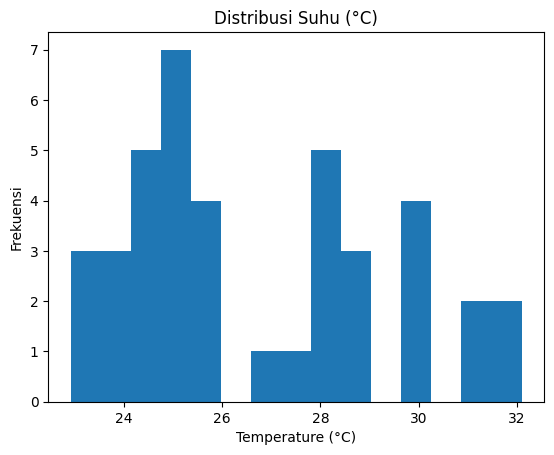

In [6]:
print("===== HISTOGRAM SUHU =====")
plt.figure()
plt.hist(df["temperature_celsius"], bins=15)
plt.title("Distribusi Suhu (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frekuensi")
plt.show()

===== HISTOGRAM KELEMBABAN =====


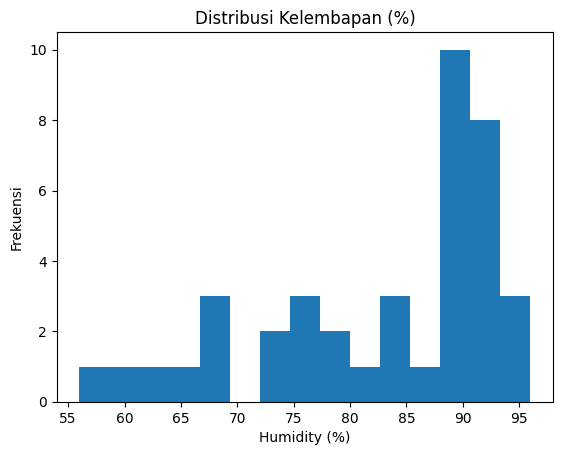

In [7]:
print("===== HISTOGRAM KELEMBABAN =====")
plt.figure()
plt.hist(df["humidity_percent"], bins=15)
plt.title("Distribusi Kelembapan (%)")
plt.xlabel("Humidity (%)")
plt.ylabel("Frekuensi")
plt.show()

===== GRAFIK SUHU TERHADAP WAKTU (TIME SERIES)=====


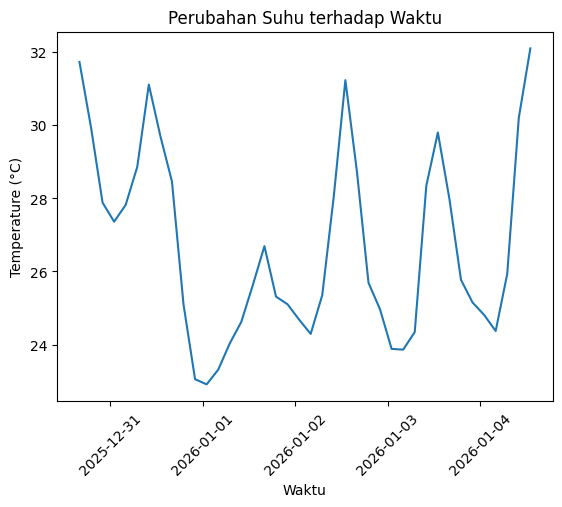

In [8]:
print("===== GRAFIK SUHU TERHADAP WAKTU (TIME SERIES)=====")
plt.figure()
plt.plot(df["datetime"], df["temperature_celsius"])
plt.xticks(rotation=45)
plt.title("Perubahan Suhu terhadap Waktu")
plt.xlabel("Waktu")
plt.ylabel("Temperature (°C)")
plt.show()


===== PERBANDINGAN SUHU dengan KELEMBABAN (SCATTER PLOT) =====


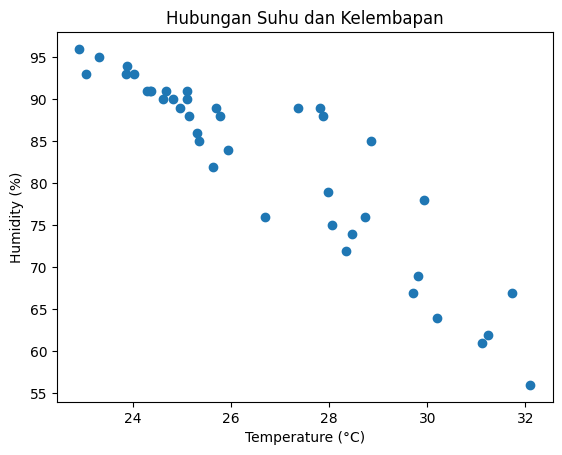

In [9]:
print("===== PERBANDINGAN SUHU dengan KELEMBABAN (SCATTER PLOT) =====")
plt.figure()
plt.scatter(df["temperature_celsius"], df["humidity_percent"])
plt.title("Hubungan Suhu dan Kelembapan")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.show()


===== BOXPLOT KELEMBABAN BERDASARKAN KONDISI CUACA =====


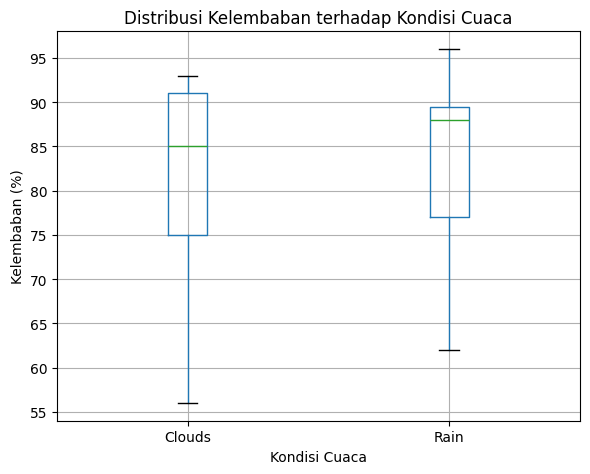

In [3]:
print("===== BOXPLOT KELEMBABAN BERDASARKAN KONDISI CUACA =====")
df.boxplot(
    column="humidity_percent",
    by="weather_main",
    figsize=(6,5)
)

plt.title("Distribusi Kelembaban terhadap Kondisi Cuaca")
plt.suptitle("")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Kelembaban (%)")
plt.tight_layout()
plt.show()


===== FREKUENSI CUACA (BAR CHART) =====


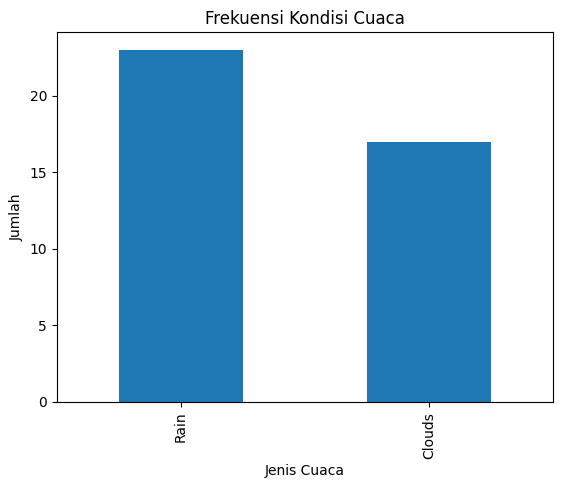

In [10]:
print("===== FREKUENSI CUACA (BAR CHART) =====")
df["weather_main"].value_counts().plot(kind="bar")
plt.title("Frekuensi Kondisi Cuaca")
plt.xlabel("Jenis Cuaca")
plt.ylabel("Jumlah")
plt.show()
